In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
import matplotlib

<IPython.core.display.Javascript object>


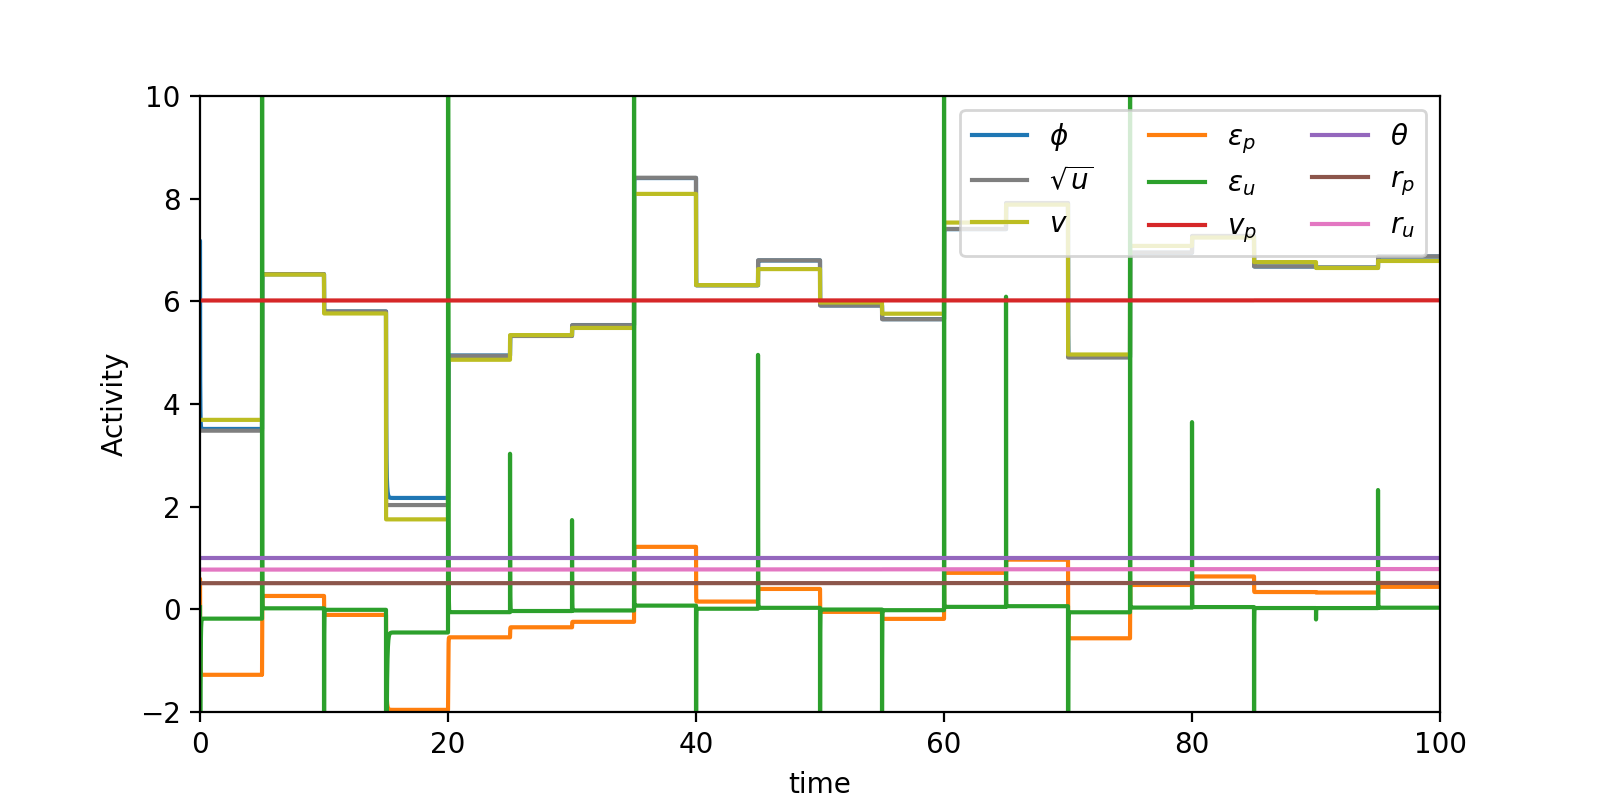

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oRmxvYXRTbGlkZXIodmFsdWU9MS4wLCBjb250aW51b3VzX3VwZGF0ZT1GYWxzZSwgZGVzY3JpcHRpb249dSd0YXUnLCBtYXg9MjAuMCwgbWnigKY=


In [6]:
from IPython.display import display

def fig_2g(CU):
    global state, params
    
    def g(v):
        return v**2

    def dg_dphi(v):
        return 2*v

    def reset_all():
        global state, params
        phi     = mu_p
        e_p     = 0
        e_u     = 0
        v_p     = mu_p
        theta   = Theta
        r_p = R_p
        r_u = R_u
        state  = np.asarray([phi, e_p, e_u], dtype=float)
        params = np.asarray([v_p, theta, r_p, r_u], dtype=float)

    def draw_fig2g(tau, w_params, reset, cont):
        global state, params

        def dphi_dt(phi, e_p, e_u, v_p, theta, r_p, r_u, u, v):
            return theta * e_u * dg_dphi(phi) - e_p

        def ep(phi, e_p, e_u, v_p, theta, r_p, r_u, u, v):
            return (phi - v_p) * r_p
        
        def eu(phi, e_p, e_u, v_p, theta, r_p, r_u, u, v):
            return (u - theta * g(phi)) * r_u
        
        def dvp(phi, e_p, e_u, v_p, theta, r_p, r_u, u, v):
            return e_p

        def drp(phi, e_p, e_u, v_p, theta, r_p, r_u, u, v):
            return (1/r_p - (phi - v_p)**2)/2.0

        def dru(phi, e_p, e_u, v_p, theta, r_p, r_u, u, v):
            return (1/r_u - (u - g(phi))**2)/2.0
                
        def dtheta(phi, e_p, e_u, v_p, theta, r_p, r_u, u, v):
            return e_u * g(phi)

        if reset == True:
            reset_all()
        [phi, e_p, e_u] = state
        [v_p, theta, r_p, r_u] = params

        [h.remove() for h in ax.get_children() if isinstance(h, matplotlib.lines.Line2D)]
        trace  = np.zeros((steps, 9))
        trace[0, 0:3] = state
        trace[0, 3:7] = params
        
        for t in range(steps-1):
            if (t*dt)%5 == 0:
                v = max(np.random.normal(mu_p, np.sqrt(1/R_p)), 0)
                trace[t, 8] = v

            if (t*dt)%5 == 0:
                u = max(np.random.normal(Theta*g(v), np.sqrt(1/R_u)), 0)
                trace[t, 7] = u

            state[0] += dt / tau * dphi_dt(*trace[t])
#             state[0] = v
            state[1] = ep(*trace[t])
            state[2] = eu(*trace[t])
            trace[t+1, 0:3] = state
            trace[t+1, 3:7] = params
            trace[t+1, 7] = u
            trace[t+1, 8] = v

            if (t*dt + 10*dt)%5 == 0:
                params += 0.1 * w_params * np.array([dvp(*trace[t+1]), 0*dtheta(*trace[t+1]), drp(*trace[t+1]), dru(*trace[t+1])])
                trace[t+1, 3:7] = params

        ax.plot(np.arange(steps) * dt, trace[:,0], color='C0')
        ax.plot(np.arange(steps) * dt, np.sqrt(trace[:,7]/trace[:,4]), color='C7')
        ax.plot(np.arange(steps) * dt, trace[:,8], color='C8')
        ax.plot(np.arange(steps) * dt, trace[:,1], color='C1')
        ax.plot(np.arange(steps) * dt, trace[:,2], color='C2')
        ax.plot(np.arange(steps) * dt, trace[:,3], color='C3')
        ax.plot(np.arange(steps) * dt, trace[:,4], color='C4')
        ax.plot(np.arange(steps) * dt, trace[:,5], color='C5')
        ax.plot(np.arange(steps) * dt, trace[:,6], color='C6')
        plt.legend([r'$\phi$', r'$\sqrt{u}$', r'$v$', 
                    r'$\varepsilon_p$', r'$\varepsilon_u$', r'$v_p$',   
                    r'$\theta$', r'$r_p$', r'$r_u$'], ncol=3, loc=1)


    # set real world mean and variance of food size and light intensity
    mu_p    = 6.0      
    R_p     = 1/2.0
    R_u     = 1/2.0
    Theta   = 1.0

    # simulation parameters
    dt      = 0.001
    dur     = 100
    steps   = int(dur/dt)

    # initialise state and parameter estimates
    reset_all()
    
    tau       = ipw.FloatSlider(value=1.0, min=0.1, max=20, step=0.1, continuous_update=CU) 
    w_params  = ipw.FloatSlider(value=0.01, min=0.01, max=2, step=0.01, continuous_update=CU) 
    sliders   = ipw.VBox([tau, w_params]) 
    reset     = ipw.ToggleButton(value=False, description='Reset', button_style='info')
    cont      = ipw.ToggleButton(value=False, description='Continue', button_style='info')
    buttons   = ipw.VBox([reset, cont])
    controls  = ipw.HBox([sliders, buttons])

    fig = plt.figure(figsize=(8,4), num='Fig 2g')
    ax  = fig.add_subplot(1, 1, 1)
    myplot = ipw.interactive(draw_fig2g, tau=tau, w_params=w_params, reset=reset, cont=cont)
    cont.value = True
    display(controls)
    plt.xlabel('time')
    plt.ylabel('Activity')
    plt.axis([0, dur, -2, 10])

    
fig_2g(False)